<a href="https://colab.research.google.com/github/andrewcboardman/gpcr_tree_mapper/blob/master/plot_gpcr_mapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/andrewcboardman/gpcr_tree_mapper

fatal: destination path 'gpcr_tree_mapper' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/gpcr_tree_mapper/gpcr_treemapper_coords.csv')
df['value'] = df.c

df.sort_values('value',ascending=False).head()

gene                                   gene_name         x         y  \
36   ADORA2A                      adenosine A2a receptor  0.387495  0.444337   
58     C5AR1                   complement C5a receptor 1  0.857771  0.464643   
87     CRHR1  corticotropin releasing hormone receptor 1  0.353896  0.764897   
295    NTSR1                      neurotensin receptor 1  0.345598  0.604762   
101     DRD4                        dopamine receptor D4  0.505190  0.165164   

     c  value  
36   1      1  
58   1      1  
87   1      1  
295  1      1  
101  1      1

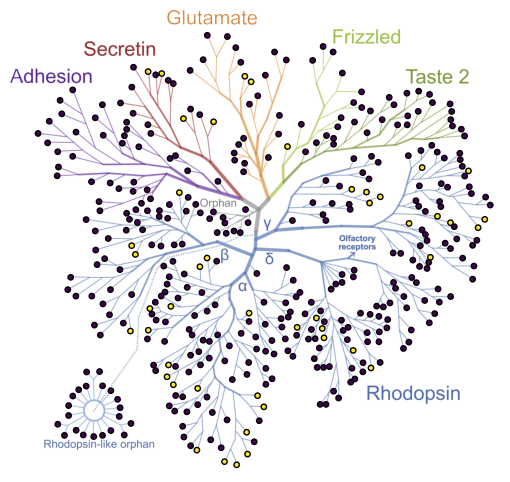

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

def plot_tree_bg(bg_source):
  img = plt.imread(bg_source)
  fig, ax = plt.subplots(figsize = (7.5,6))
  fig.patch.set_facecolor('white')
  ax.imshow(img)
  ax.axis('off')
  return ax

bg_source="/content/gpcr_tree_mapper/gpcr_treemapper_tree.png"


ax = plot_tree_bg(bg_source)
ax.scatter(df.x, df.y, c = df.value, cmap='viridis', edgecolor='k',transform = ax.transAxes, s = 15)


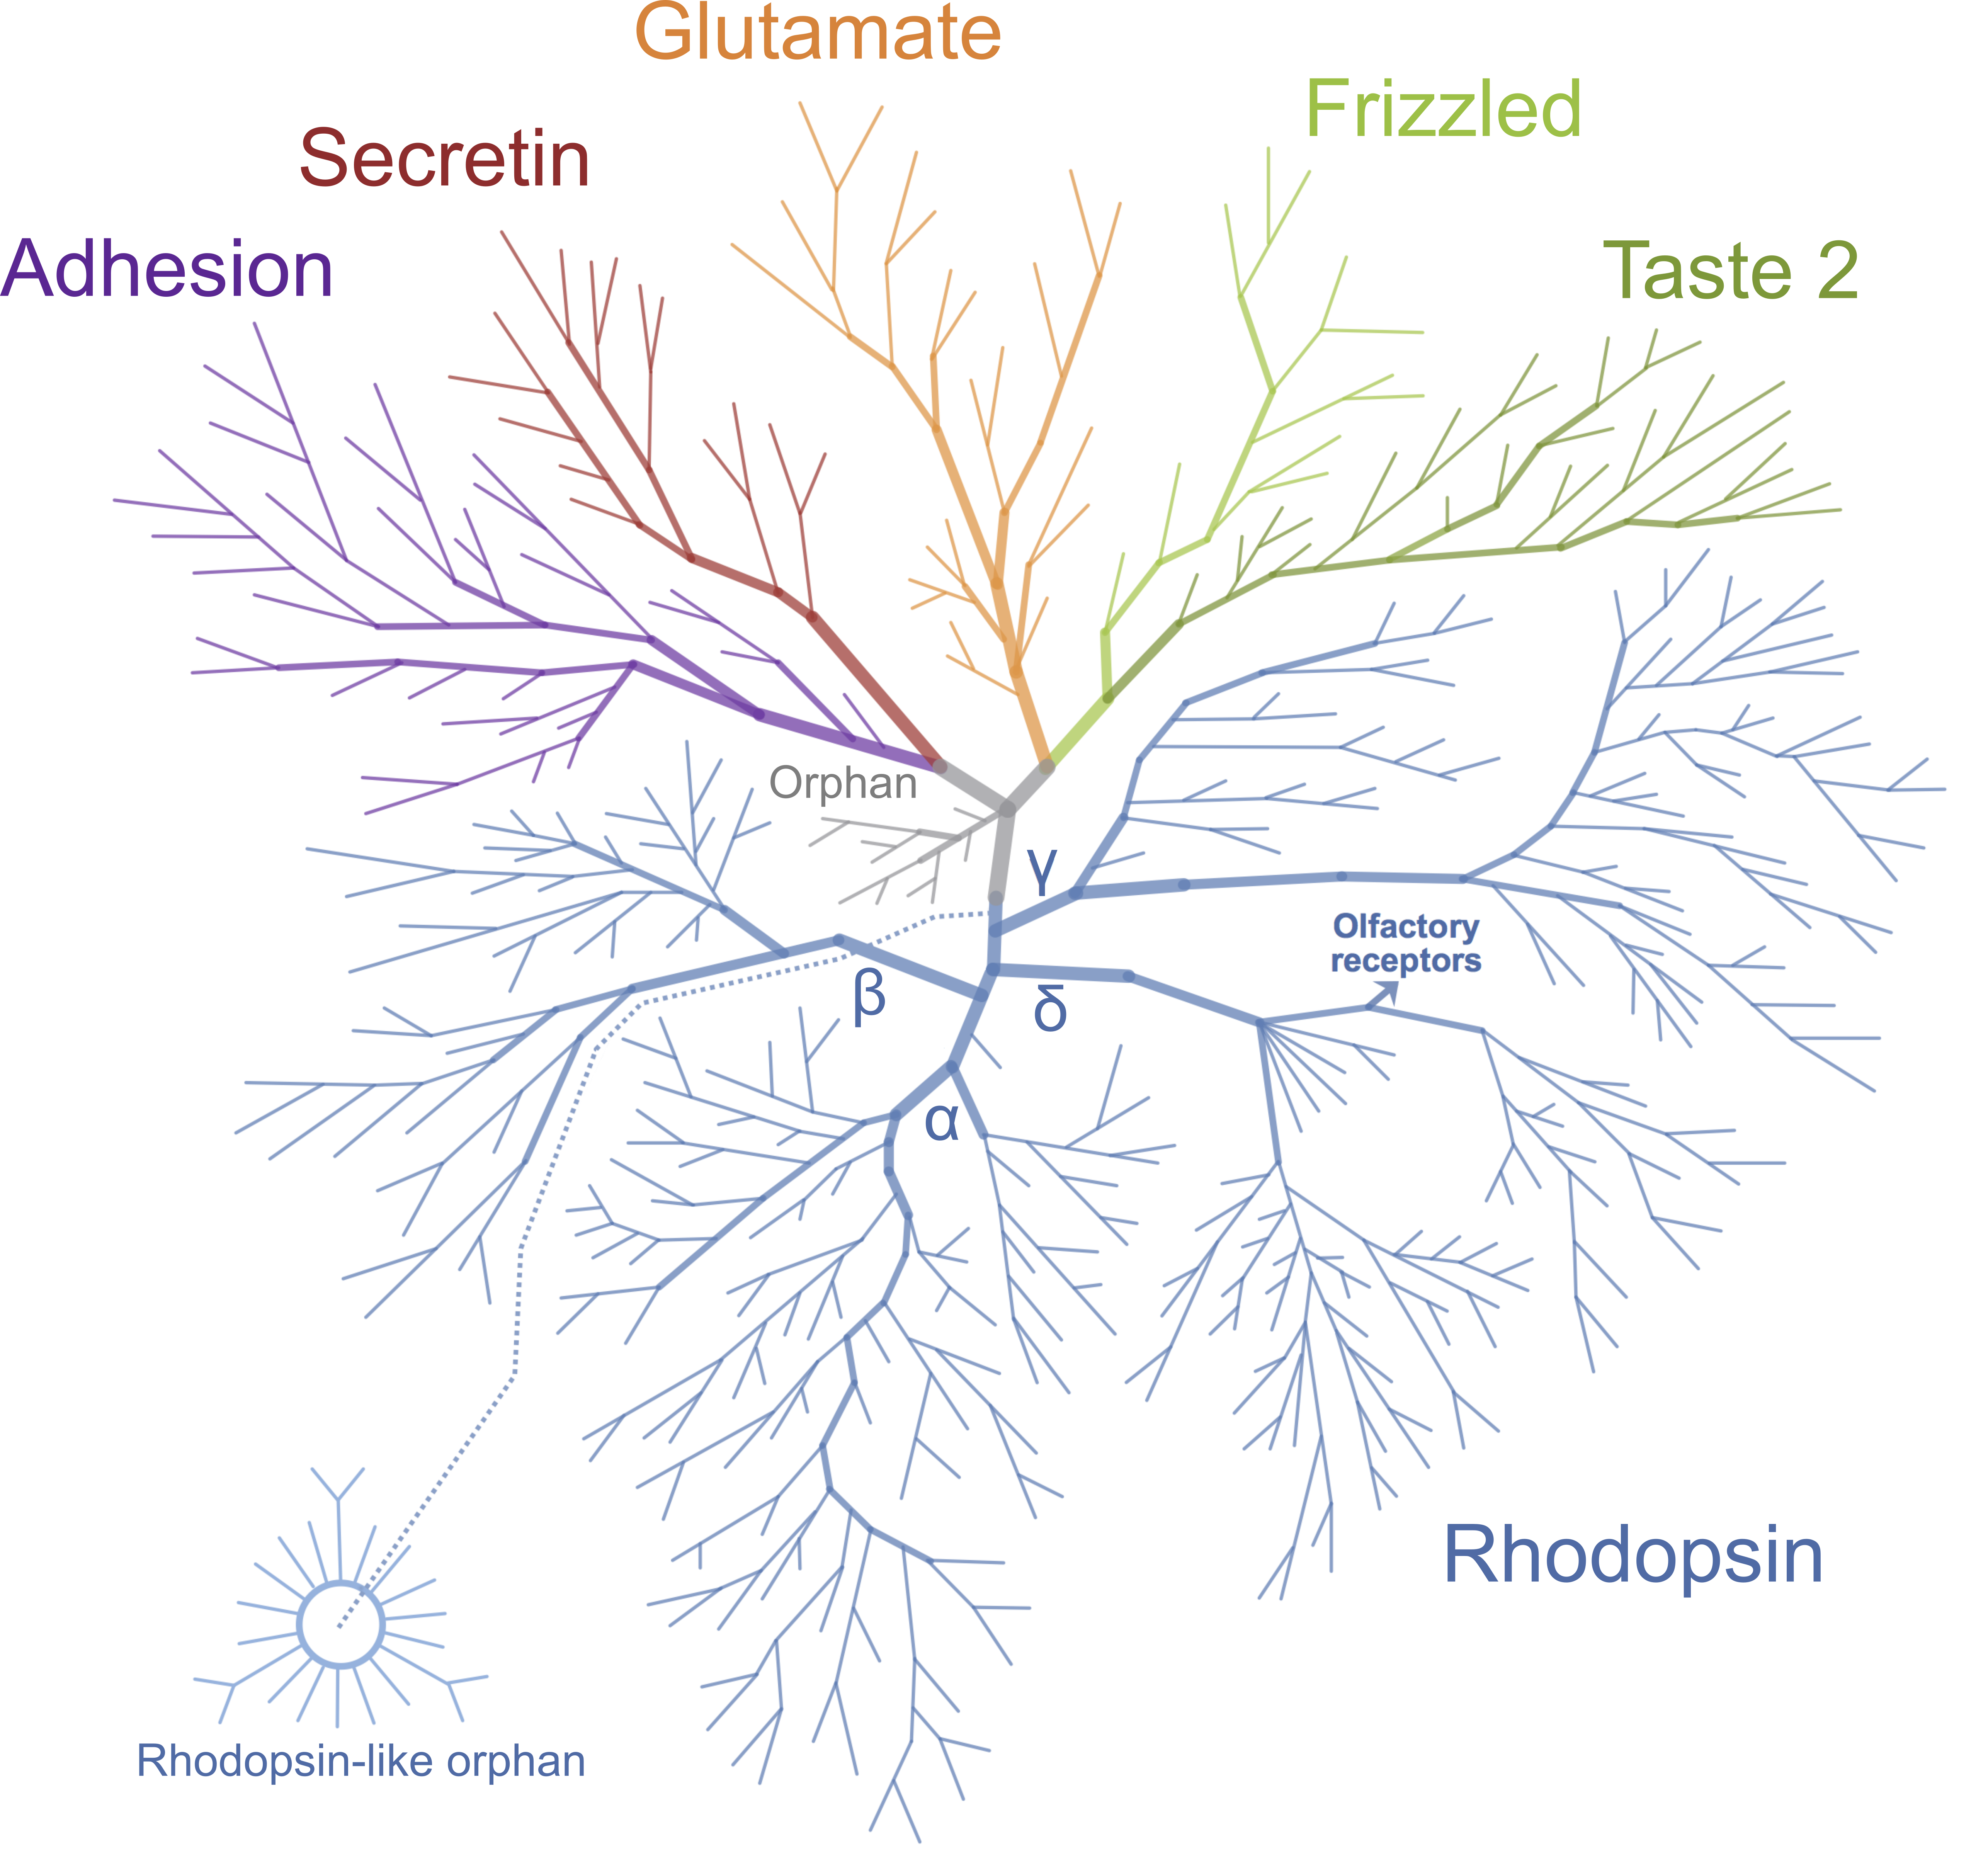

In [6]:
import plotly.graph_objects as go
from PIL import Image

def plotly_tree_bg(bg_source):
  img = Image.open(bg_source)
  img = dict(source= img,
      xref= "x", yref= "y", x= 0, y= 1, sizex= 1, sizey= 1,
      sizing= "stretch", opacity= 1.0, layer= "below")
  margin = go.layout.Margin(
          l=25, #left margin
          r=0, #right margin
          b=0, #bottom margin
          t=25, #top margin
      )
  layout= go.Layout(images= [img], margin = margin,
      autosize=False, showlegend=False, width=750, height=700,
      paper_bgcolor='rgba(255,255,255,1)',
      plot_bgcolor='rgba(255,255,255,1)')

  fig=go.Figure(layout=layout)
  fig.update_xaxes(visible=False)
  fig.update_yaxes(visible=False)
  return fig


bg_source="/content/gpcr_tree_mapper/gpcr_treemapper_tree.png"

fig = plotly_tree_bg(bg_source)

labels = [f'<b>{symbol}</b>: {value:.2f}<br>{name}</br><extra></extra>' \
          for symbol, value, name in zip(df.gene.tolist(), df.value.tolist(), df.gene_name.tolist())]

trace = go.Scatter(x=df.x, y=df.y, text = labels,
                   marker = {'color': df.value,
              'colorscale': 'viridis',
              'size': 10,
              'line':dict(width=2,color='DarkSlateGrey')
             },
                   hovertemplate = '%{text}', mode = 'markers')
fig.add_trace(trace)

fig.show()